#Load Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

#Load the dataset

In [4]:
data = pd.read_csv("/content/tweets.csv")
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


#Data Preprocessing

In [5]:
print(data.isnull().sum())


id       0
label    0
tweet    0
dtype: int64


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB
None


In [7]:
print(data.describe())

                id        label
count  7920.000000  7920.000000
mean   3960.500000     0.255808
std    2286.451399     0.436342
min       1.000000     0.000000
25%    1980.750000     0.000000
50%    3960.500000     0.000000
75%    5940.250000     1.000000
max    7920.000000     1.000000


In [8]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [9]:
def preprocess_text(text):
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove mentions, hashtags, and special characters
    text = re.sub(r'@\w+|#\w+|[^a-zA-Z\s]', '', text)
    # Tokenization
    tokens = text.split()
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)


In [10]:
# Apply preprocessing to the 'tweet' column
data['cleaned_tweet'] = data['tweet'].apply(preprocess_text)

In [11]:
# Show the first few cleaned rows
print("\nCleaned Dataset Preview:")
print(data[['tweet', 'cleaned_tweet']].head())


Cleaned Dataset Preview:
                                               tweet  \
0  #fingerprint #Pregnancy Test https://goo.gl/h1...   
1  Finally a transparant silicon case ^^ Thanks t...   
2  We love this! Would you go? #talk #makememorie...   
3  I'm wired I know I'm George I was made that wa...   
4  What amazing service! Apple won't even talk to...   

                                       cleaned_tweet  
0                                               test  
1      finally transparant silicon case thanks uncle  
2                                      love would go  
3                   im wired know im george made way  
4  amazing service apple wont even talk question ...  


#Feature Extraction and Vectorization

In [12]:
# Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_tweet']).toarray()
y = data['label']

In [13]:
# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print("Train-Test Split Done")
print(f"Training Data Shape: {X_train.shape}, Test Data Shape: {X_test.shape}")

Train-Test Split Done
Training Data Shape: (6336, 5000), Test Data Shape: (1584, 5000)


#Model Training

In [15]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
train_accuracy = model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

Training Accuracy: 0.89


#Model Evaluation

In [16]:
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")


Test Accuracy: 0.83


In [17]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1152
           1       0.83      0.48      0.61       432

    accuracy                           0.83      1584
   macro avg       0.83      0.72      0.75      1584
weighted avg       0.83      0.83      0.82      1584



F1-Scores: Class 1 has a lower F1-score, indicating an imbalance in the detection of positive sentiments.

#Use Advanced Models (Random Forest)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)


In [20]:
rf_test_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Test Accuracy: {rf_test_accuracy:.2f}")

Random Forest Test Accuracy: 0.85


In [21]:
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1152
           1       0.82      0.56      0.67       432

    accuracy                           0.85      1584
   macro avg       0.84      0.76      0.78      1584
weighted avg       0.84      0.85      0.84      1584



#LSTM

In [56]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
# Tokenization and Padding
max_vocab_size = 5000
max_sequence_length = 100

# Tokenize the text data
tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(data['cleaned_tweet'])
X_seq = tokenizer.texts_to_sequences(data['cleaned_tweet'])


In [24]:
X_padded = pad_sequences(X_seq, maxlen=max_sequence_length)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)


In [26]:
# Build the LSTM model
model = Sequential([
    Embedding(input_dim=max_vocab_size, output_dim=64, input_length=max_sequence_length),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [27]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                     validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"LSTM Test Accuracy: {test_accuracy:.2f}")

Epoch 1/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 16s 77ms/step - accuracy: 0.7477 - loss: 0.4969 - val_accuracy: 0.8651 - val_loss: 0.3234
Epoch 2/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - accuracy: 0.8852 - loss: 0.2805 - val_accuracy: 0.8762 - val_loss: 0.3035
Epoch 3/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 21s 77ms/step - accuracy: 0.9321 - loss: 0.1854 - val_accuracy: 0.8659 - val_loss: 0.3370
Epoch 4/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - accuracy: 0.9533 - loss: 0.1380 - val_accuracy: 0.8636 - val_loss: 0.3730
Epoch 5/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 21s 77ms/step - accuracy: 0.9685 - loss: 0.1086 - val_accuracy: 0.8446 - val_loss: 0.4205
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8730 - loss: 0.2786
LSTM Test Accuracy: 0.86


In [29]:
print(data.columns)

Index(['id', 'label', 'tweet', 'cleaned_tweet'], dtype='object')


In [30]:
print(data.head())

   id  label                                              tweet  \
0   1      0  #fingerprint #Pregnancy Test https://goo.gl/h1...   
1   2      0  Finally a transparant silicon case ^^ Thanks t...   
2   3      0  We love this! Would you go? #talk #makememorie...   
3   4      0  I'm wired I know I'm George I was made that wa...   
4   5      1  What amazing service! Apple won't even talk to...   

                                       cleaned_tweet  
0                                               test  
1      finally transparant silicon case thanks uncle  
2                                      love would go  
3                   im wired know im george made way  
4  amazing service apple wont even talk question ...  


In [31]:
# Check class distribution
class_counts = data['label'].value_counts()

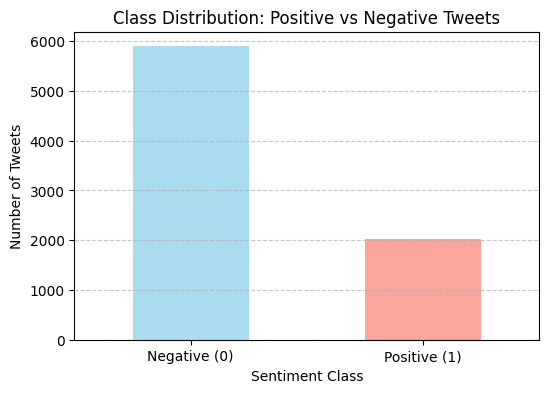

In [32]:
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'], alpha=0.7)
plt.title("Class Distribution: Positive vs Negative Tweets")
plt.xlabel("Sentiment Class")
plt.ylabel("Number of Tweets")
plt.xticks([0, 1], ['Negative (0)', 'Positive (1)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [33]:
print("Class Distribution:\n", class_counts)

Class Distribution:
 label
0    5894
1    2026
Name: count, dtype: int64


#Applying SMOTE

In [34]:
X = data['cleaned_tweet']  # Using preprocessed text column
y = data['label']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [36]:
# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to 5000 words for efficiency
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [37]:
!pip install imbalanced-learn


In [38]:
from imblearn.over_sampling import SMOTE


In [47]:
X_train_df = pd.DataFrame({'tweet': X_train, 'label': y_train})

# Separate positive and negative tweets
pos_tweets = X_train_df[X_train_df['label'] == 1]  # Positive tweets
neg_tweets = X_train_df[X_train_df['label'] == 0]  # Negative tweets


In [46]:
print("Before Oversampling:")
print("Positive tweets:", len(pos_tweets))
print("Negative tweets:", len(neg_tweets))

Before Oversampling:
Positive tweets: 1621
Negative tweets: 4715


This confirms class imbalance, where positive tweets are significantly fewer than negative ones.

In [50]:
# Oversample positive tweets to match negative tweets
pos_oversampled = pos_tweets.sample(len(neg_tweets), replace=True, random_state=42)

# Combine with negative tweets
balanced_df = pd.concat([neg_tweets, pos_oversampled]).sample(frac=1, random_state=42)  # Shuffle

# Extract final training data
X_train_balanced = balanced_df['tweet'].tolist()
y_train_balanced = balanced_df['label'].tolist()

In [51]:
print("After Oversampling:")
print("Positive tweets:", sum(np.array(y_train_balanced) == 1))
print("Negative tweets:", sum(np.array(y_train_balanced) == 0))

After Oversampling:
Positive tweets: 4715
Negative tweets: 4715


Now that the dataset is balanced

In [52]:
# Tokenization parameters
max_words = 5000  # Vocabulary size
max_len = 50

In [53]:
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train_balanced)

In [54]:
# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train_balanced)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')


In [55]:
print("Shape of padded sequences for training:", X_train_pad.shape)
print("Shape of padded sequences for testing:", X_test_pad.shape)

Shape of padded sequences for training: (9430, 50)
Shape of padded sequences for testing: (1584, 50)


In [63]:
vocab_size = 5000
embedding_dim = 128
max_length = 50
lstm_units = 64
dropout_rate = 0.2
output_classes = 1

In [64]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(units=lstm_units, return_sequences=False),
    Dropout(dropout_rate),
    Dense(output_classes, activation='sigmoid')
])


In [65]:
model.build(input_shape=(None, max_length))

In [66]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 50, 128)             │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 689,473 (2.63 MB)

 Trainable params: 689,473 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Train the Model
history = model.fit(
    X_train_pad, np.array(y_train_balanced),
    validation_data=(X_test_pad, np.array(y_test)),
    epochs=10,
    batch_size=64,
    verbose=1
)

Epoch 1/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - accuracy: 0.4999 - loss: 0.6940 - val_accuracy: 0.7443 - val_loss: 0.6908
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.5101 - loss: 0.6936 - val_accuracy: 0.7443 - val_loss: 0.6926
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - accuracy: 0.5002 - loss: 0.6935 - val_accuracy: 0.7443 - val_loss: 0.6927
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 19s 73ms/step - accuracy: 0.5097 - loss: 0.6933 - val_accuracy: 0.2557 - val_loss: 0.6953
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - accuracy: 0.5049 - loss: 0.6934 - val_accuracy: 0.7443 - val_loss: 0.6908
Epoch 6/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 22s 83ms/step - accuracy: 0.5019 - loss: 0.6934 - val_accuracy: 0.2557 - val_loss: 0.6992
Epoch 7/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 18s 68ms/step - accuracy: 0.4938 - loss: 0.6932 - val_accuracy: 0.7443 - val_loss: 0.6869
Epoch 8/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - accuracy: 0.5006 - loss: 0.6932 -

In [70]:
# Get model predictions
y_pred = model.predict(X_test_pad)

# Convert probabilities to class labels (0 or 1)
y_pred_class = (y_pred > 0.5).astype(int)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [71]:
# Check distribution of predictions
unique, counts = np.unique(y_pred_class, return_counts=True)
dict(zip(unique, counts))

{1: 1584}